In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa


In [10]:
df = pd.read_csv(".\\datasets\\IRIS.CSV")
for col in df.columns:
  if col == "species":
    break
  _mean = df[col].mean()
  _std = df[col].std()
  df[col] = df[col].apply(lambda x: (x - _mean)/_std)

In [18]:
data = df.loc[:, "sepal_length":"petal_width"].to_numpy()

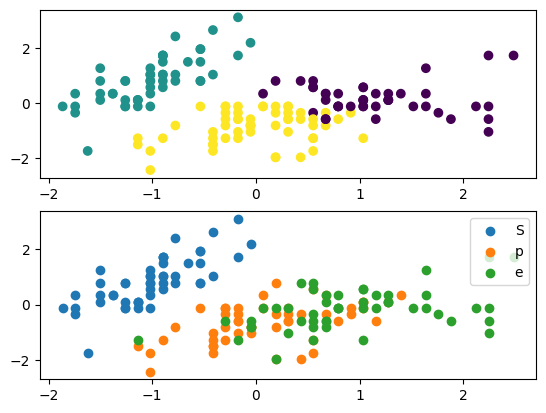

In [ ]:
for i in range(1, 4):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)

fig, axes = plt.subplots(2)
axes[0].scatter(x=df["sepal_length"], y=df["sepal_width"], c=kmeans.labels_)

for s in df["species"].unique():
  _subset = df[df["species"] == s]
  axes[1].scatter(x=_subset["sepal_length"], y=_subset["sepal_width"], label=s)

axes[1].legend("Species")
axes[0].set_title("Predicted species")
fig.tight_layout()


In [38]:
_mapping = {
  0: 'Iris-virginica',
  1: 'Iris-setosa',
  2: 'Iris-versicolor'
}

vect_func = np.vectorize(lambda x: _mapping[x])

actual_labels = df["species"]
predicted_labels = vect_func(kmeans.labels_)

n = actual_labels.shape[0]
count = 0
for _bool in actual_labels == predicted_labels:
  if _bool: count += 1

print(count/n)


0.8133333333333334
